In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [8]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [9]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [10]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    # MSE is used
    
    e = y-tx.dot(w)
    N = len(y)
    return 1/(2*N)*e.T.dot(e)


# 2 Grid Search

Fill in the function `grid_search()` below:

In [11]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i,v0 in enumerate(w0, start=0):
        for j,v1 in enumerate(w1, start=0):
            w = np.array([v0,v1])
            losses[i][j] = compute_loss(y,tx,w)
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.831 seconds


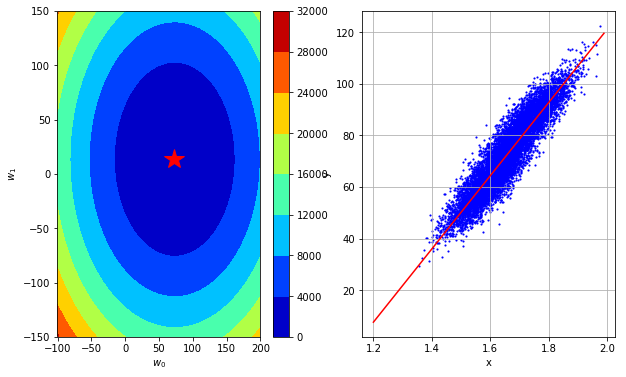

In [12]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [13]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N = len(y)
    e = y-tx.dot(w)
    return -1/N*tx.T.dot(e)
    
print(compute_gradient(y,tx, np.array([100,20])))
print(compute_gradient(y,tx, np.array([50,10])))

[ 26.706078     6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [14]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w-gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [15]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591665, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.30246210896195, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.8783795504416, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.4102121201745, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450453, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265298, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.387363601208634, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743533, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638303, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412119, w1=13.

<function __main__.plot_figure>

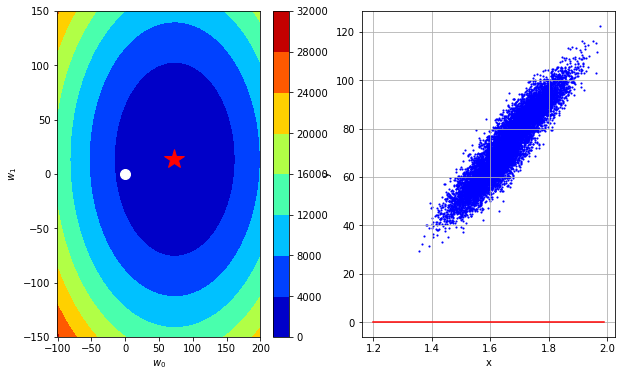

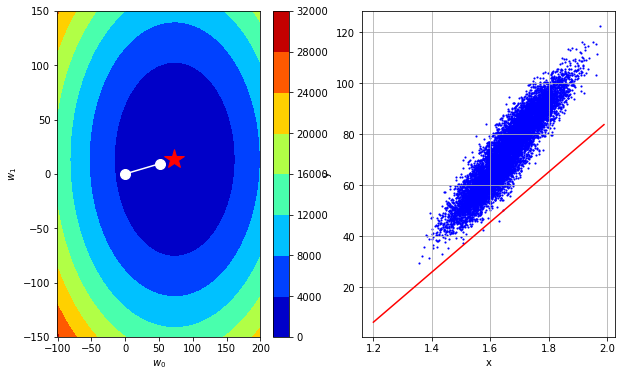

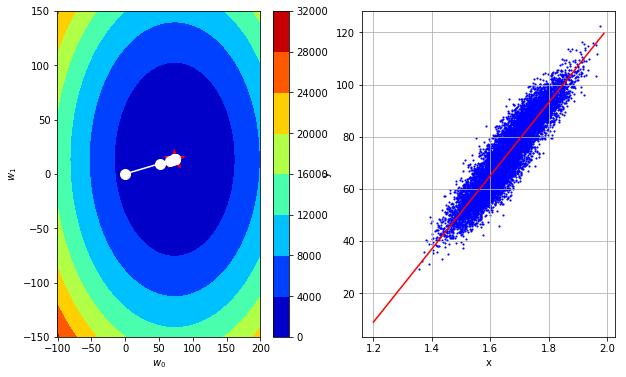

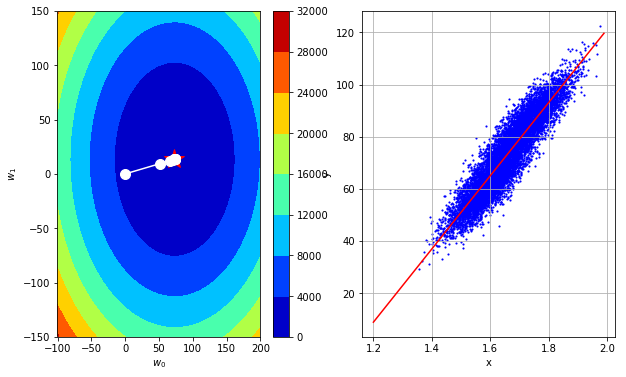

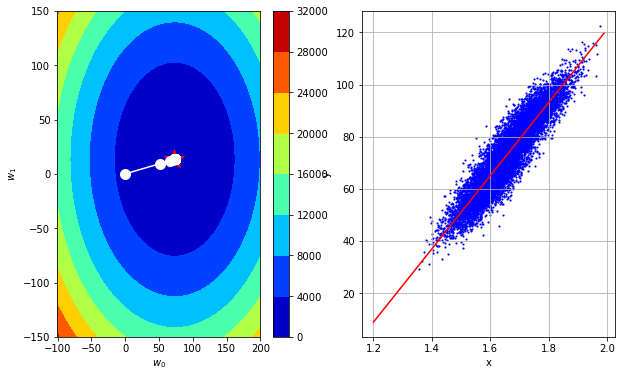

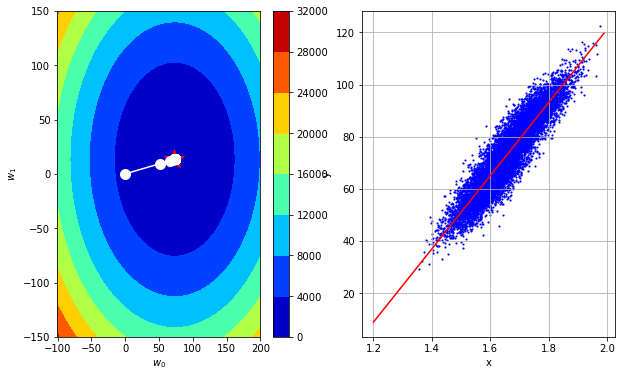

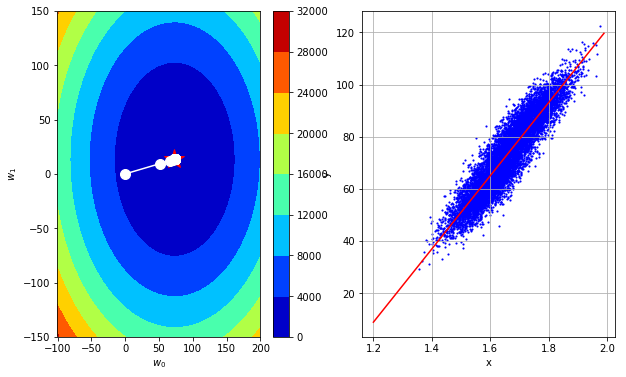

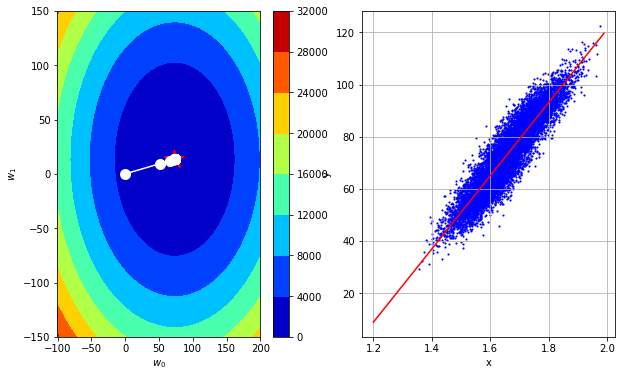

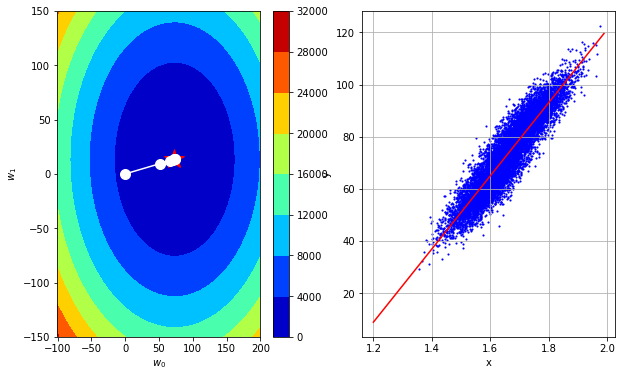

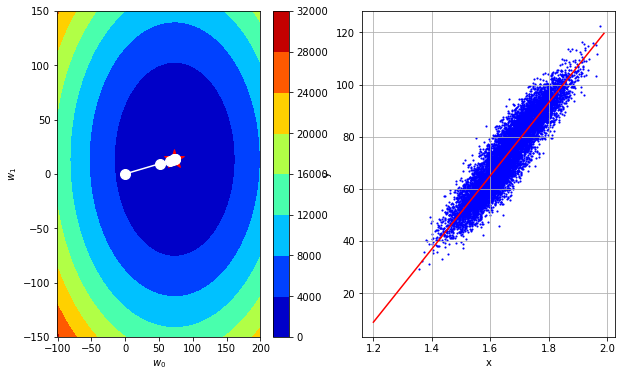

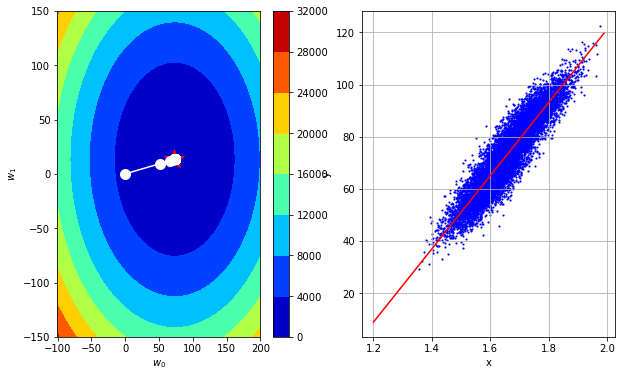

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [56]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent. 
    # ***************************************************
    N = len(y)
    e = y-tx.dot(w)
    return -1/N*tx.T.dot(e)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    # Define parameters to store w and the losses
    losses = []
    ws = [initial_w]
    w = initial_w

    for n_iter in range(max_iters):
        #Stochastic choice
        random_index = np.random.choice(range(len(y)), batch_size)
            
        yp = y[random_index]
        txp = tx[random_index]
        
        #Gradient Descent
        grad = compute_gradient(yp,txp,w)
        loss = compute_loss(yp,txp,w)
        
        w = w-gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
                              
    return losses, ws

In [57]:
st_gradient_losses, st_gradient_ws = stochastic_gradient_descent(y, tx, w_initial, 5, max_iters, gamma)

Gradient Descent(0/49): loss=2978.9180259479454, w0=53.8493882517132, w1=19.945948487129527
Gradient Descent(1/49): loss=248.94110077132765, w0=68.44551581421548, w1=4.894971217261
Gradient Descent(2/49): loss=94.20451025062006, w0=73.77024414427748, w1=13.86458783676075
Gradient Descent(3/49): loss=10.341310132893655, w0=72.50937568537073, w1=14.385778826998083
Gradient Descent(4/49): loss=26.36333697202075, w0=72.39629531698532, w1=8.812607861268466
Gradient Descent(5/49): loss=28.635843303218696, w0=71.19302071807303, w1=11.377087427579228
Gradient Descent(6/49): loss=18.32170147233938, w0=70.8864585988447, w1=13.67483347754559
Gradient Descent(7/49): loss=1.5540770855014667, w0=70.65354306345313, w1=13.095657567873554
Gradient Descent(8/49): loss=30.616451828229103, w0=75.22069857334755, w1=16.684302554903716
Gradient Descent(9/49): loss=16.62501032097172, w0=73.18987718853339, w1=14.970807114190759
Gradient Descent(10/49): loss=40.24671142838455, w0=73.25907864337142, w1=15.639542

In [61]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2352.8769657978614, w0=47.13340007394976, w1=-13.360540259221997
Gradient Descent(1/49): loss=271.90554276397444, w0=54.39936252543114, w1=-8.623581804275094
Gradient Descent(2/49): loss=380.9962606507299, w0=66.85623731946933, w1=6.918287293620532
Gradient Descent(3/49): loss=61.50971758316489, w0=71.05041427863507, w1=12.257293716003062
Gradient Descent(4/49): loss=6.269202347698425, w0=71.64538884133478, w1=12.854736842398385
Gradient Descent(5/49): loss=19.203879476611686, w0=72.83549828455521, w1=14.956113231548017
Gradient Descent(6/49): loss=13.733708457124942, w0=74.64103854924745, w1=12.759591081890274
Gradient Descent(7/49): loss=10.159118444594666, w0=74.02930634164039, w1=13.712317399208814
Gradient Descent(8/49): loss=8.225376457945917, w0=72.93738370315613, w1=13.046791261172034
Gradient Descent(9/49): loss=6.386557173722014, w0=71.99213811493449, w1=14.36458099700032
Gradient Descent(10/49): loss=10.083688268811327, w0=72.27447285776579, w1=1

<function __main__.plot_figure>

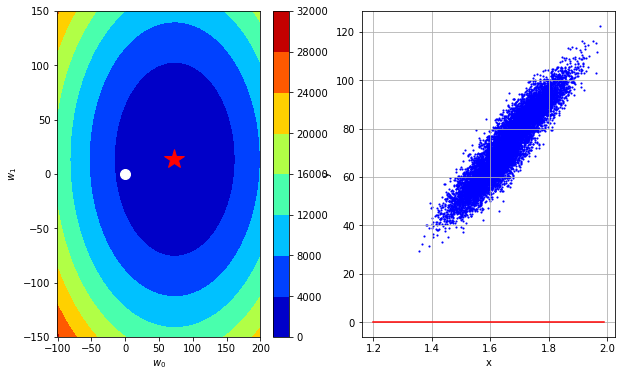

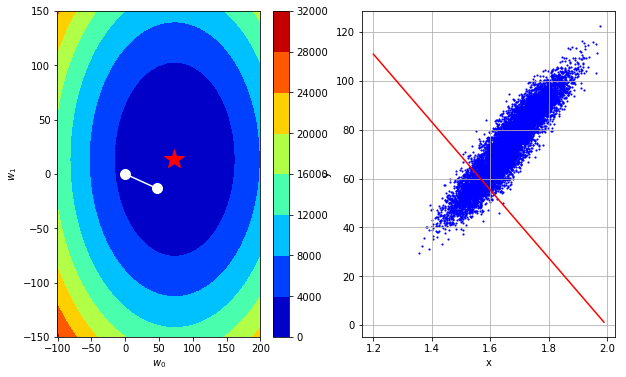

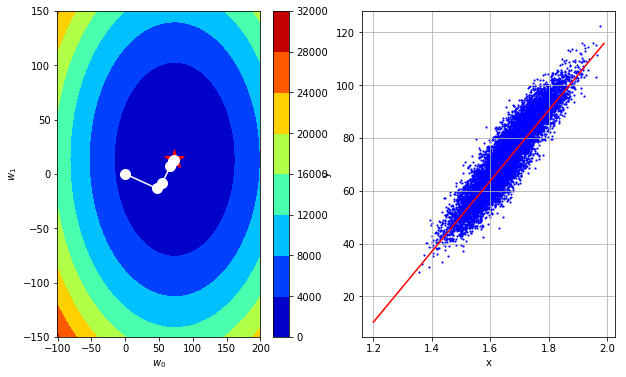

In [62]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)